# Allstate Insurance Claim Severity Prediction

##### Introduction

This code is to develop a machine learning model to predict insurance claims severity. The data was obtained from Kaggle https://www.kaggle.com/c/allstate-claims-severity/data. The data was explored for missing values, and outliers were handled before developing the models. Random Forest and Gradient Boosting Regressors were applied to predict the loss using base models. To further improve the prediction, the hyperparameters were tuned using Random Search CV. The Grid Search CV was also tried but it took too long time to complete the parameter tunning, and the optimization was aborted. Likewise, my computer's memory wasn't sufficient enough to model the problem using XGBoost Machine Learning algorithm.

##### Importing the necessary packages 

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle

In [2]:
#modify the display options to view entire dataframe
pd.options.display.max_columns = None

##### Loading the training data

In [3]:
train_data = pd.read_csv("train.csv")

##### Loading the testing data

In [4]:
test_data = pd.read_csv("test.csv")

##### Exploring the data

In [5]:
train_data.shape

(188318, 132)

In [6]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [7]:
column_names = np.array(train_data.columns)
print(column_names)

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

In [8]:
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 132 columns):
 #    Column  Non-Null Count   Dtype  
---   ------  --------------   -----  
 0    id      188318 non-null  int64  
 1    cat1    188318 non-null  object 
 2    cat2    188318 non-null  object 
 3    cat3    188318 non-null  object 
 4    cat4    188318 non-null  object 
 5    cat5    188318 non-null  object 
 6    cat6    188318 non-null  object 
 7    cat7    188318 non-null  object 
 8    cat8    188318 non-null  object 
 9    cat9    188318 non-null  object 
 10   cat10   188318 non-null  object 
 11   cat11   188318 non-null  object 
 12   cat12   188318 non-null  object 
 13   cat13   188318 non-null  object 
 14   cat14   188318 non-null  object 
 15   cat15   188318 non-null  object 
 16   cat16   188318 non-null  object 
 17   cat17   188318 non-null  object 
 18   cat18   188318 non-null  object 
 19   cat19   188318 non-null  object 
 20   cat20   188318 non-null 

In [9]:
train_data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


###### Separating categorical and numerical columns to check the data distributions

In [12]:
column_datatypes = train_data.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
numerical_columns = list(column_datatypes[column_datatypes=="float64"].index.values)
numerical_columns.remove('loss')  

The loss was removed since it is the target variable. It can be explored separatly.

##### Checking the distribution of categorical variables

In [13]:
#a function to calculate value counts for categorical columns
def category_distribution(train_data,categorical_columns):
    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(train_data[cat_column].value_counts())
    return(categorical_column_distribution)

In [14]:
categorical_column_distribution = category_distribution(train_data,categorical_columns)

In [15]:
categorical_column_distribution

[A    141550
 B     46768
 Name: cat1, dtype: int64,
 A    106721
 B     81597
 Name: cat2, dtype: int64,
 A    177993
 B     10325
 Name: cat3, dtype: int64,
 A    128395
 B     59923
 Name: cat4, dtype: int64,
 A    123737
 B     64581
 Name: cat5, dtype: int64,
 A    131693
 B     56625
 Name: cat6, dtype: int64,
 A    183744
 B      4574
 Name: cat7, dtype: int64,
 A    177274
 B     11044
 Name: cat8, dtype: int64,
 A    113122
 B     75196
 Name: cat9, dtype: int64,
 A    160213
 B     28105
 Name: cat10, dtype: int64,
 A    168186
 B     20132
 Name: cat11, dtype: int64,
 A    159825
 B     28493
 Name: cat12, dtype: int64,
 A    168851
 B     19467
 Name: cat13, dtype: int64,
 A    186041
 B      2277
 Name: cat14, dtype: int64,
 A    188284
 B        34
 Name: cat15, dtype: int64,
 A    181843
 B      6475
 Name: cat16, dtype: int64,
 A    187009
 B      1309
 Name: cat17, dtype: int64,
 A    187331
 B       987
 Name: cat18, dtype: int64,
 A    186510
 B      1808
 Name: cat1

#### Data cleaning and pre-processing

In [16]:
#Check if there is any missing value in the columuns
max(train_data.isnull().sum())

0

In [17]:
max(test_data.isnull().sum())

0

There was no missing values both in the train and test dataset, which is uncommon in most data science problems.

##### Handling outliers in the dataset

Use of boxplot to visualize outliers.

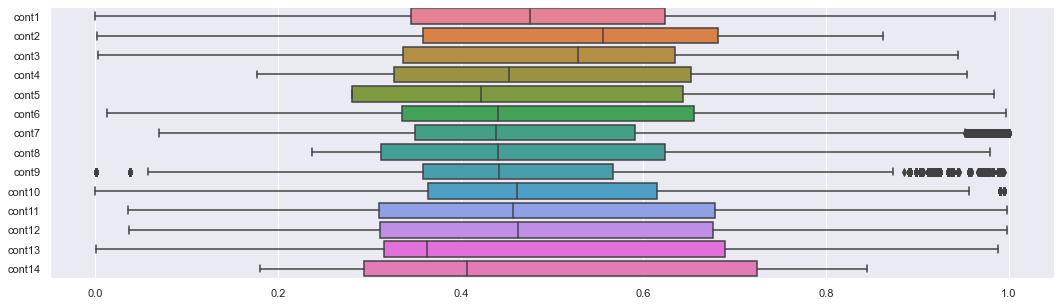

In [19]:
ax = sns.boxplot(data=train_data[numerical_columns], orient="h", palette="husl")
sns.set(rc={'figure.figsize':(25,5)})

In [20]:
columns_with_outlier = ['cont7','cont9','cont10']

The outliers were handled using the using the IRQ (interquartile rang) approach. The following general class functions were written to test couple of approaches.  

In [21]:

class Data_preprocessing:
    def __init__(self,train_data):
        self.train_data = train_data
    
    def outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action):
        if action=="median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                meadian_outlier = np.median(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=meadian_outlier
        if action=="mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=mean_outlier
        if action=="remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train_data = self.train_data[~((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train_data
    

In [22]:
# compute the interquartile range for all continuous columns
Q1 = train_data[numerical_columns].quantile(0.25)
Q3 = train_data[numerical_columns].quantile(0.75)
IQR = (Q3-Q1)

In [23]:
# calling the class object and the handle outlier function to replace outliers using "median"
Data_preprocessing_obj = Data_preprocessing(train_data)
train_data = Data_preprocessing_obj.outlier_treatment(Q1,Q3,IQR,columns_with_outlier,"median")

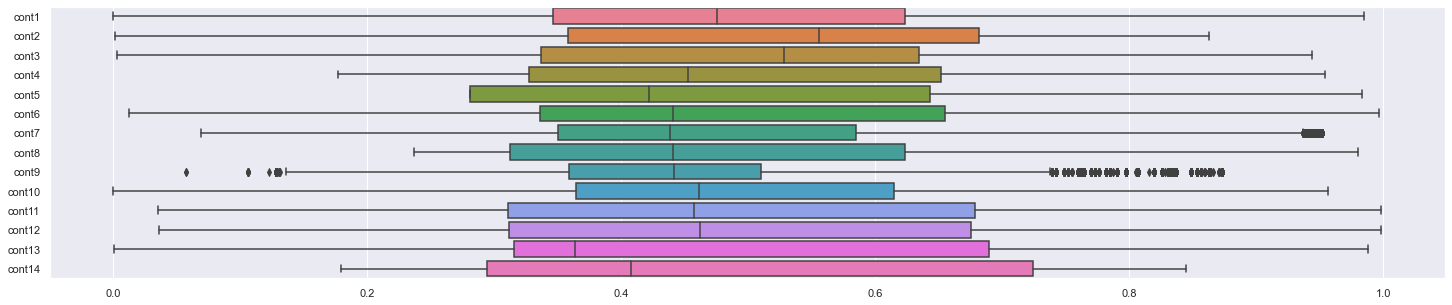

In [24]:
ax = sns.boxplot(data=train_data[numerical_columns], orient="h", palette="husl")
sns.set(rc={'figure.figsize':(25,5)})

Most of the outliers in cont7, and cont10 are replaced with the median values. Still some outliers remain on cont9, but let's proceed, and see how the prediction behaves with this data.

##### Feature selection for continuous and categorical features

Firest, feature selection for numeric variables using three conditions:
1. removing features with constant variance since features with the same variance will not add new information to the model
2. removing features with quasi-constant variance using a fixed threshold since these features provide same values for a very large subset of the outputs
3. removing correlated features since they convey redundent information, and retaining one of them and removing the rest reduces number of features and model efficiency


In [25]:

def feature_selection_numerical_variables(train_data,qthreshold,corr_threshold,exclude_numerical_cols_list):
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns_list = list(train_data.select_dtypes(include=num_colums).columns)
    numerical_columns_list = [column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    #remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train_data[numerical_columns_list])
    constant_columns = [column for column in train_data[numerical_columns_list].columns 
                    if column not in train_data[numerical_columns_list].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train_data.drop(labels=constant_columns, axis=1, inplace=True)

    #update numerical columns list
    numerical_columns_list = [column for column in numerical_columns_list if column not in constant_columns]
        
    #remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train_data[numerical_columns_list])
    qconstant_columns = [column for column in train_data[numerical_columns_list].columns 
                         if column not in train_data[numerical_columns_list].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train_data.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    #update numerical columns list
    numerical_columnsList = [column for column in numerical_columns_list if column not in qconstant_columns]
    
    #remove correlated variables
    correlated_features = set()
    correlation_matrix = train_data[numerical_columns_list].corr()
    ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(30, 330, n=300),
    square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train_data.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train_data,constant_columns,qconstant_columns,correlated_features
    

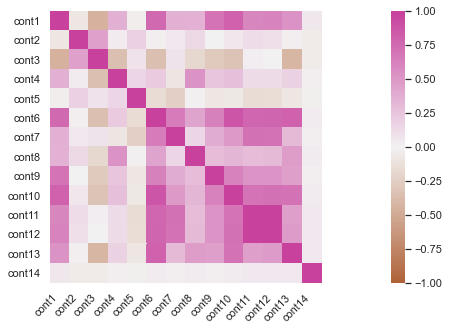

In [26]:
train_data,constant_columns,qconstant_columns,correlated_features =feature_selection_numerical_variables(train_data,0.01,0.75,['loss','id'],)

In [27]:
correlated_features

{'cont10', 'cont12', 'cont6'}

In [28]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.335060,0.30260,0.67135,0.569745,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.436585,0.60087,0.35127,0.338312,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.315545,0.27320,0.26076,0.381398,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.391128,0.31796,0.32128,0.327915,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.247408,0.24564,0.22089,0.204687,0.246011,0.432606,2763.85


##### Handling correlation between categorical variables

To identify correlation between categorical variables, it was necessary to convert them into numerical values, which was done using lebel ecncoder in this project.

In [29]:
# saving the encoders to disk to for fitting later on the test data
for cf1 in categorical_columns:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    filename = cf1+".sav"
    pickle.dump(le, open(filename, 'wb'))
    train_data[cf1] = le.transform(train_data[cf1])

In [31]:
# code to calculate the unique values of categorical columns
df = pd.DataFrame(columns=["Column_Name","Count"])
for cat in categorical_columns:
    unique_value_count = len(train_data[cat].unique())
    df = df.append({'Column_Name': cat, "Count":int(unique_value_count)}, ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)

In [32]:
df

,Column_Name,Count
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
...,...,...
111,cat112,51
112,cat113,61
113,cat114,19
114,cat115,23


In [33]:
columns_unique_value

array([  2,   4,   3,   7,   5,   8,  20,  19,  17,  16,  51,  15,  23,
        11,  13, 131,  84,   9, 326,  61], dtype=int64)

In [34]:
# code to identify and drop correlated categorical variables
columns_to_drop_cat = set()
correlated_columns = dict()
for unique_value_count in columns_unique_value:
    if unique_value_count>1:
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train_data[columns_compare_against],train_data[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [35]:
train_data = train_data.drop(columns_to_drop_cat,axis=1)

In [36]:
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

#output the columns_to_drop file to a csv
columns_to_drop_df=pd.DataFrame(columns_to_drop,columns=['colnames'])
columns_to_drop_df.to_csv("columns_to_drop.csv",index=False)

##### Visualizing the target variable, loss

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


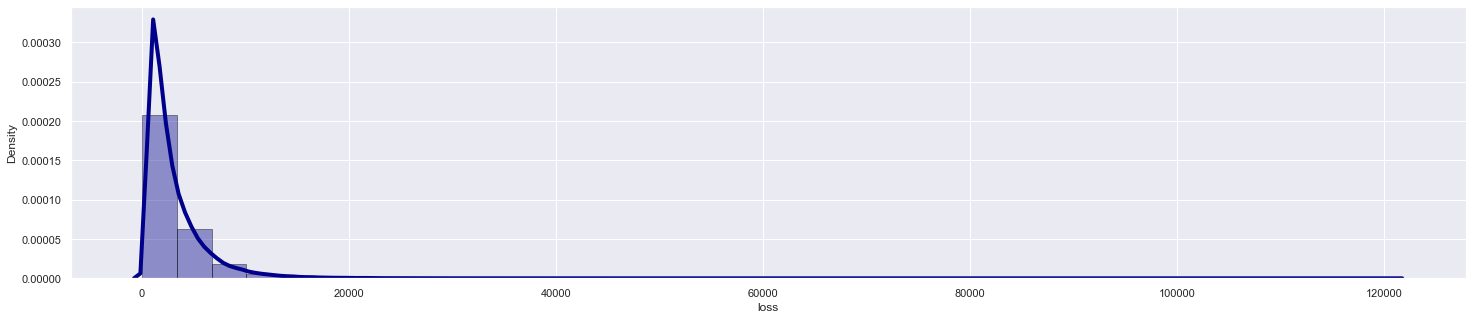

In [37]:
sns.distplot(train_data['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

The loss values are highly skewed to the right. Predicting such variables is challenging. However, reducing the scale using log transformation may help to predict it better.

In [38]:
# log transforming the dependent loss feature
train_data['loss'] = np.log(train_data['loss'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


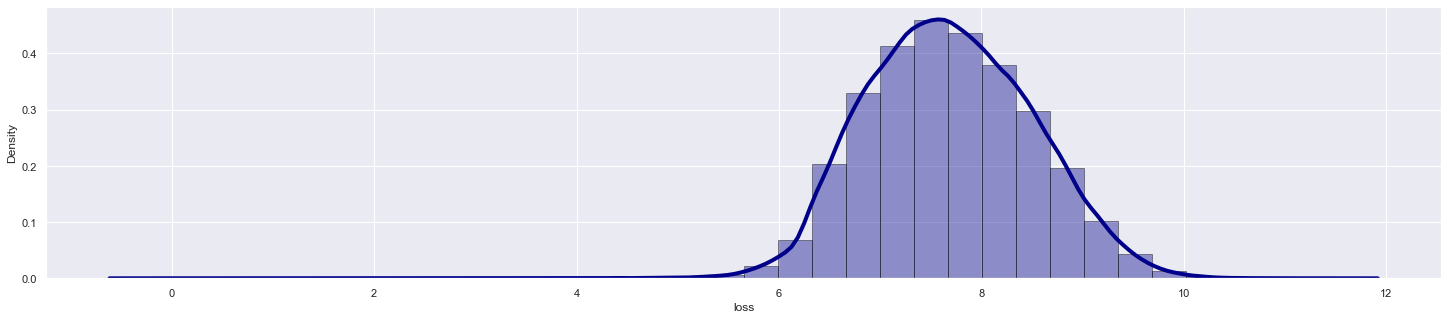

In [39]:
# visualizing the distribution of loss value after log transformation
sns.distplot(train_data['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

##### Fitting Machine Learning models

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [44]:
X,y = train_data.drop(['id','loss'],axis=1),train_data['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
max(train_data.isnull().sum())

0

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 41 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      188318 non-null  int64  
 1   cat1    188318 non-null  int32  
 2   cat15   188318 non-null  int32  
 3   cat22   188318 non-null  int32  
 4   cat32   188318 non-null  int32  
 5   cat73   188318 non-null  int32  
 6   cat75   188318 non-null  int32  
 7   cat77   188318 non-null  int32  
 8   cat88   188318 non-null  int32  
 9   cat89   188318 non-null  int32  
 10  cat90   188318 non-null  int32  
 11  cat93   188318 non-null  int32  
 12  cat94   188318 non-null  int32  
 13  cat95   188318 non-null  int32  
 14  cat96   188318 non-null  int32  
 15  cat99   188318 non-null  int32  
 16  cat100  188318 non-null  int32  
 17  cat101  188318 non-null  int32  
 18  cat102  188318 non-null  int32  
 19  cat103  188318 non-null  int32  
 20  cat104  188318 non-null  int32  
 21  cat105  18

##### fitting a Random Forest ML model

In [47]:
# Instantiate model with 100 decision trees
RF_basemodel = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)
RF_basemodel.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [48]:
#save the model output
pickle.dump(RF_basemodel, open("basemodel_RF", 'wb'))

In [49]:
#load the saved model and predict on the test data
basedmodel_RF = pickle.load(open("basemodel_RF", 'rb'))

In [50]:
#validate the accuracy of the base model
y_test_predict_base = basedmodel_RF.predict(X_test)
print("Base model accuracy:",np.sqrt(mean_squared_error(y_test, y_test_predict_base)))

Base model accuracy: 0.6665736920718738


###### HyperParameter tuning using RandomSearchCV

In [51]:
# number of trees in the foreset
n_estimators = [100,200,300,400,500]
# maximum number of features considered for splitting a node
max_features = ['auto', 'sqrt']
# maximum number of levels in each decision tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# minimum number of data points placed in a node before the node is split
min_samples_split = [200,400,600]
# Minimum number of data points allowed in a leaf node
min_samples_leaf = [1, 2, 4]
# Method sampling data points (with or without replacement)
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
# use of the random grid to search for best hyperparameters
RF = RandomForestRegressor()

# 5 fold cross validation, 
RF_tuned = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, cv = 5, n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
RF_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(RF_tuned, open("tunedmodel_RF", 'wb'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [53]:
#check the best params
RF_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [54]:
#load the saved model and predict on the test data
tunedmodel_RF = pickle.load(open("tunedmodel_RF", 'rb'))

y_test_predict_tuned = tunedmodel_RF.predict(X_test)
print("Tuned model accuracy:",np.sqrt(mean_squared_error(y_test, y_test_predict_tuned)))

Tuned model accuracy: 0.6527964291081841


The accuracy of the tunned random forest model imporved compared to the base model.

###### HyperParameter tuning using GridSearchCV --- interupted the run as it took too longtime to optimize

In [236]:
# number of trees in the foreset
n_estimators = [100,200,300,400,500]
# maximum number of features considered for splitting a node
max_features = ['auto', 'sqrt']
# maximum number of levels in each decision tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# minimum number of data points placed in a node before the node is split
min_samples_split = [200,400,600]
# Minimum number of data points allowed in a leaf node
min_samples_leaf = [1, 2, 4]
# Method sampling data points (with or without replacement)
bootstrap = [True, False]

# Create the grid search parameters
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [242]:
# use of the grid search approach to identify best hyperparameters
# base model to tune
RF = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
RF_tuned_GridSearch = GridSearchCV(RF, grid_search, cv = 5, verbose=2)

# Fit the random search model
RF_tuned_GridSearch.fit(X_train, y_train)

#save the model output
pickle.dump(RF_tuned_GridSearch, open("tunedGridSearchmodel_RF", 'wb'))

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=200, n_estimators=100; total time=  49.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=200, n_estimators=100; total time=  50.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=200, n_estimators=100; total time=  48.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=200, n_estimators=100; total time=  50.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=200, n_estimators=100; total time=  48.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=200, n_estimators=200; total time= 1.7min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=200, n_esti

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=600, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=600, n_estimators=300; total time= 2.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=600, n_estimators=300; total time= 2.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=600, n_estimators=300; total time= 2.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=600, n_estimators=300; total time= 2.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=600, n_estimators=300; total time= 2.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=600, n_estimators=400; total time= 3.1min
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=400, n_estimators=400; total time= 3.2min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=400, n_estimators=500; total time= 4.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=400, n_estimators=500; total time= 4.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=400, n_estimators=500; total time= 4.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=400, n_estimators=500; total time= 4.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=400, n_estimators=500; total time= 4.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=600, n_estimators=100; total time=  49.0s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=400, n_estimators=100; total time=  50.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=400, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=400, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=400, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=400, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=400, n_estimators=200; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=400, n_estimators=300; total time= 2.4min
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=200, n_estimators=300; total time=  25.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=200, n_estimators=400; total time=  34.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=200, n_estimators=400; total time=  35.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=200, n_estimators=400; total time=  35.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=200, n_estimators=400; total time=  33.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=200, n_estimators=400; total time=  34.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=200, n_estimators=500; total time=  44.5s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=600, n_estimators=500; total time=  41.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=   8.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=   8.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=200, n_estimators=200; total time=  16.5s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=600, n_estimators=200; total time=  15.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=600, n_estimators=300; total time=  23.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=600, n_estimators=300; total time=  24.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=600, n_estimators=300; total time=  24.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=600, n_estimators=300; total time=  23.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=600, n_estimators=300; total time=  23.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=600, n_estimators=400; total time=  31.5s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=400, n_estimators=400; total time=  33.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=400, n_estimators=500; total time=  40.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=400, n_estimators=500; total time=  41.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=400, n_estimators=500; total time=  41.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=400, n_estimators=500; total time=  40.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=400, n_estimators=500; total time=  40.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=600, n_estimators=100; total time=   8.2s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=400, n_estimators=100; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=400, n_estimators=200; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=400, n_estimators=200; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=400, n_estimators=200; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=400, n_estimators=200; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=400, n_estimators=200; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=400, n_estimators=300; total time= 3.2min
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=300; total time= 3.7min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=400; total time= 4.8min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=400; total time= 4.8min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=400; total time= 4.8min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=400; total time= 4.8min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=400; total time= 4.7min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=500; total time= 5.8min
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=600, n_estimators=500; total time= 4.9min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=200, n_estimators=100; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=200, n_estimators=100; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=200, n_estimators=100; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=200, n_estimators=100; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=200, n_estimators=100; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=200, n_estimators=200; total time= 2.4min
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=600, n_estimators=200; total time= 1.9min


KeyboardInterrupt: 

##### Fitting a Gradient Boosting Regressor 

In [55]:
from sklearn.ensemble import GradientBoostingRegressor  
gbm_basemodel = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)

gbm_basemodel.fit(X_train,y_train)

#save the GBM model
pickle.dump(gbm_basemodel, open("basemodel_GBM", 'wb'))

In [57]:
#load the saved model and predict on the test data
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))

y_test_predict_tuned = basemodel_GBM.predict(X_test)
print("Base model GBM accuracy:",np.sqrt(mean_squared_error(y_test, y_test_predict_tuned)))

Base model GBM accuracy: 0.7002303143731882


###### HyperParameter tuning using RandomSearchCV

In [58]:
# number of trees in the foreset
n_estimators = [100,200,300,400,500]
# maximum number of levels in each decision tree
max_depth = [2, 3, 5, 10, 15]
# minimum number of data points placed in a node before the node is split
min_samples_split = [1,2,3,5,7]
# Minimum number of data points allowed in a leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Learning rate 
learning_rate = [0.15,0.1,0.05,0.01,0.005]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

In [59]:
# use of the random grid to search for best hyperparameters
GBR = GradientBoostingRegressor()

# 5 fold cross validation, 
GBR_tuned = RandomizedSearchCV(estimator = GBR, param_distributions = random_grid, cv = 5, n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
GBR_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(GBR_tuned, open("tunedmodel_GBR", 'wb'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [60]:
RF_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [61]:
#load the saved model and predict on the test data
tunedmodel_GBR = pickle.load(open("tunedmodel_GBR", 'rb'))

y_test_predict_tuned = tunedmodel_GBR.predict(X_test)
print("Tuned model accuracy:",np.sqrt(mean_squared_error(y_test, y_test_predict_tuned)))

Tuned model accuracy: 0.6420191129971186


Therefore, the tuned Gradient Boosting Regressor provided better mean sequare error in predicting the loss. I also tried the Grid Search CV to tune the hyperparameters; however, it took too long time to complete the parameterization, and I aborted the search. I also tried to model the problem using XGBoost Machine Learning algorithm; however, my computer's memeory wasn't sufficient enough to run the model.